In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_validate

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import scipy.stats as st
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [41]:
input_file = "data/breastcancer.csv"
df = pd.read_csv(input_file, header=0)

df.head()

,STK35,DPYSL4,GJC2,FMNL1,LIG3,CA6,BRPF1,BRMS1,CXCL13,SIAE,...,ADRB1,DRD4,GABRR1,KRT10,PIP,MS4A3,SECISBP2L,EMP3,HOXB1,Class
0,0.425,-0.316,0.465,-0.142,-0.033,0.357,-0.197,-0.280,3.164,-0.086,...,-0.188,-0.015,-0.035,0.722,0.131,-0.545,0.323,-0.400,0.064,Basal
1,0.694,-0.497,0.200,-0.215,0.852,0.300,-0.864,-0.222,6.179,-0.649,...,0.200,-0.416,0.293,-0.795,1.785,-1.224,0.505,-0.275,0.300,Basal
2,0.304,-0.205,0.739,0.176,0.726,0.715,0.298,0.147,3.612,-0.230,...,0.211,0.170,0.156,-0.733,2.414,-0.435,0.047,-0.980,0.233,Basal
3,0.309,-0.561,0.669,-0.514,0.805,0.409,-0.974,0.054,1.280,-0.150,...,-0.532,0.884,0.633,-0.586,0.163,-0.987,0.223,-1.090,0.603,Basal
4,0.732,-0.287,0.311,-0.326,-0.468,1.887,-0.347,-0.193,2.410,0.479,...,0.354,0.596,0.270,-0.282,0.601,0.164,0.040,-0.705,0.054,Basal


In [42]:
#label_encoder = LabelEncoder()
df.dtypes



STK35        float64
DPYSL4       float64
GJC2         float64
FMNL1        float64
LIG3         float64
              ...   
MS4A3        float64
SECISBP2L    float64
EMP3         float64
HOXB1        float64
Class         object
Length: 13583, dtype: object

In [43]:
#Checking missing data
df.isna().sum()

STK35        0
DPYSL4       0
GJC2         0
FMNL1        0
LIG3         0
            ..
MS4A3        0
SECISBP2L    0
EMP3         0
HOXB1        0
Class        0
Length: 13583, dtype: int64

In [6]:
df.nunique()

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
enc = OrdinalEncoder()

In [31]:
df.columns

In [45]:
#enc.fit(df[['Class']])
enc.fit(df[:])

In [33]:
#df[['Class']]= enc.transform(df[['Class']])
df[:] = enc.transform(df[:])

In [34]:
df.head()

In [46]:
X = df.iloc[:, 0:13582]
y = df.iloc[:, -1]

In [47]:
X.head()

,STK35,DPYSL4,GJC2,FMNL1,LIG3,CA6,BRPF1,BRMS1,CXCL13,SIAE,...,MAS1,ADRB1,DRD4,GABRR1,KRT10,PIP,MS4A3,SECISBP2L,EMP3,HOXB1
0,128.0,46.0,73.0,81.0,32.0,120.0,107.0,33.0,103.0,54.0,...,23.0,45.0,8.0,26.0,144.0,5.0,51.0,95.0,135.0,58.0
1,134.0,20.0,27.0,63.0,135.0,109.0,8.0,42.0,156.0,6.0,...,26.0,104.0,2.0,111.0,82.0,46.0,4.0,117.0,140.0,111.0
2,113.0,70.0,114.0,118.0,124.0,138.0,142.0,90.0,119.0,32.0,...,3.0,106.0,12.0,69.0,92.0,54.0,69.0,38.0,61.0,98.0
3,114.0,14.0,104.0,15.0,130.0,124.0,2.0,76.0,39.0,40.0,...,9.0,12.0,71.0,134.0,110.0,6.0,11.0,75.0,45.0,137.0
4,135.0,49.0,43.0,43.0,5.0,145.0,83.0,45.0,81.0,121.0,...,7.0,125.0,43.0,102.0,128.0,27.0,141.0,33.0,100.0,56.0


In [48]:
y.head()

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
153    4.0
154    4.0
155    4.0
156    4.0
157    4.0
Name: Class, Length: 158, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [18]:
#f_score= chi2(X_train, y_train)

In [19]:
#f_score
#f_score[1]
#pvalues= pd.Series(f_score[1])
#pvalues.index=X_train.columns
#pvalues
#pvalues.sort_values(ascending=False)

#chi2_selector= SelectKBest(chi2, k=2)
#X_kbest= chi2_selector.fit_transform(X,y)


In [78]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,STK35,DPYSL4,GJC2,FMNL1,LIG3,CA6,BRPF1,BRMS1,CXCL13,SIAE,...,ADRB1,DRD4,GABRR1,KRT10,PIP,MS4A3,SECISBP2L,EMP3,HOXB1,Class
0,128,46,73,81,32,120,107,33,103,54,...,45,8,26,144,5,51,95,135,58,0
1,134,20,27,63,135,109,8,42,156,6,...,104,2,111,82,46,4,117,140,111,0
2,113,70,114,118,124,138,142,90,119,32,...,106,12,69,92,54,69,38,61,98,0
3,114,14,104,15,130,124,2,76,39,40,...,12,71,134,110,6,11,75,45,137,0
4,135,49,43,43,5,145,83,45,81,121,...,125,43,102,128,27,141,33,100,56,0


In [80]:
from sklearn.feature_selection import chi2

X2 = df.drop(columns=['Class'], axis=1)
y2 = df['Class']

In [81]:
chi_scores = chi2(X2, y2)
chi_scores

(array([235.14977607, 183.224132  , 226.33530002, ..., 252.31104765,
        219.20056223,   8.9996489 ]),
 array([1.02770304e-49, 1.51374539e-38, 8.11815112e-48, ...,
        2.06865169e-53, 2.78585769e-46, 6.11082575e-02]))

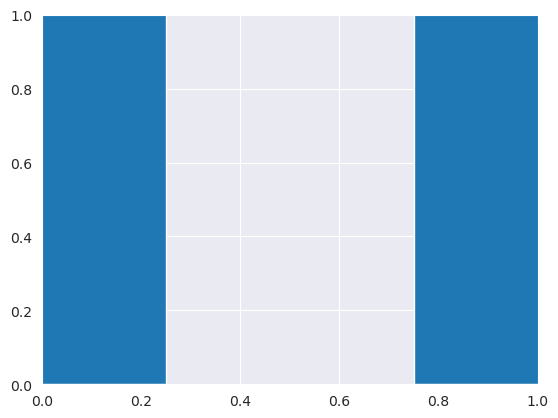

In [ ]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X2.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

In [98]:
p_values = pd.Series(chi_scores[0], index=X2.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values

TBC1D9    3051.250222
GATA3     2947.192731
AGR3      2859.384426
THSD4     2821.659640
FOXA1     2777.666195
             ...     
UBAP1        4.613070
PRLHR        4.173949
SCN11A       3.799679
TEKT1        2.118612
MYF5         1.552496
Length: 13582, dtype: float64

In [62]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
#print(mutual_info)
#mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
print(mutual_info)
print("a")

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [63]:
#No we Will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]



Index(['AGR3', 'FOXA1', 'PPP1R14C', 'CENPF', 'AR'], dtype='object')

In [126]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [127]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([235.14977607, 183.224132  , 226.33530002, ..., 252.31104765,
       219.20056223,   8.9996489 ])

In [74]:
X_new = test.fit_transform(X, y)
X_new

array([[ 38.,   5.,  44.,   5.],
       [ 16.,  10.,  52.,  34.],
       [ 11.,  21.,  24.,  22.],
       [ 42.,   8.,  34.,  20.],
       [ 49.,  42.,  38.,  14.],
       [ 46.,  27.,   6.,  45.],
       [ 23.,  32.,  18.,  54.],
       [  6.,  37.,  22.,  71.],
       [ 51.,  30.,  36.,   7.],
       [ 14.,   9.,  10.,   0.],
       [ 31.,  14.,  19.,  32.],
       [  0.,  26.,  51.,  37.],
       [ 37.,  24.,  14.,  46.],
       [  4.,  17.,  12.,  49.],
       [ 27.,   1.,   0.,  11.],
       [ 41.,   3.,   5.,   6.],
       [ 22.,  19.,  25.,  44.],
       [ 44.,  43.,  23.,  27.],
       [ 53.,  15.,   7.,  55.],
       [ 12.,   2.,   9.,  25.],
       [ 30.,  20.,   4.,  61.],
       [  2.,  28.,   1.,  61.],
       [ 45.,  76.,  16.,  16.],
       [ 40.,  16.,  31.,  21.],
       [ 13.,  22.,  71.,  40.],
       [  5.,   4.,  27.,  47.],
       [ 52.,  59.,  40.,  12.],
       [ 33.,  23.,  20.,   4.],
       [  3.,  40.,  41.,  18.],
       [ 39.,   6.,  42.,   9.],
       [ 2

In [137]:
# chi2_selector = SelectKBest(chi2, k=4)
# X_kbest = chi2_selector.fit_transform(X, y)
# print(X_kbest)
# print('Original number of features:', X.shape)
# print('Reduced number of features:', X_kbest.shape)
# X_kbest
# cols = chi2_selector.get_support(indices=True)
# features_df_new = chi2_selector.iloc[:,cols]
selector = SelectKBest(chi2, k=5)
selector.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:, cols]
features_df_new

,AGR3,FOXA1,THSD4,TBC1D9,GATA3
0,38.0,29.0,5.0,44.0,5.0
1,16.0,5.0,10.0,52.0,34.0
2,11.0,39.0,21.0,24.0,22.0
3,42.0,16.0,8.0,34.0,20.0
4,49.0,15.0,42.0,38.0,14.0
...,...,...,...,...,...
153,65.0,54.0,113.0,57.0,58.0
154,69.0,50.0,104.0,74.0,48.0
155,80.0,55.0,122.0,92.0,78.0
156,63.0,58.0,68.0,67.0,92.0


In [113]:
from sklearn.metrics import confusion_matrix


def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {'TN': cm[0, 0], 'FP': cm[0, 1], 'FN': cm[1, 0], 'TP': cm[1, 1]
        , 'PPV': np.divide(cm[1, 1], cm[1, 1] + cm[0, 1], where=cm[1, 1] + cm[0, 1] != 0)
        , 'NPV': np.divide(cm[0, 0], cm[0, 0] + cm[1, 0], where=cm[0, 0] + cm[1, 0] != 0)
        , 'Sensitivity': np.divide(cm[1, 1], cm[1, 1] + cm[1, 0], where=cm[1, 1] + cm[1, 0] != 0)
        , 'Specificity': np.divide(cm[0, 0], cm[0, 0] + cm[0, 1], where=cm[0, 0] + cm[0, 1] != 0)
        , 'Accuracy': np.divide(cm[1, 1] + cm[0, 0], cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1],
                                where=cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1] != 0)}

In [114]:
per_can = MLPClassifier(random_state=1, max_iter=300)

In [115]:
cv_results_circle = cross_validate(per_can, X, y, cv=2, scoring=confusion_matrix_scorer)

In [116]:
acc_circle = np.mean(cv_results_circle['test_Accuracy'])

In [117]:
print(np.mean(cv_results_circle['test_PPV']))
print(np.mean(cv_results_circle['test_NPV']))
print(np.mean(cv_results_circle['test_Sensitivity']))
print(np.mean(cv_results_circle['test_Specificity']))
print(np.mean(cv_results_circle['test_Accuracy']))

0.9444444444444444
0.8809523809523809
0.5666666666666667
0.975
0.8833333333333333


In [56]:
X

,STK35,DPYSL4,GJC2,FMNL1,LIG3,CA6,BRPF1,BRMS1,CXCL13,SIAE,...,MAS1,ADRB1,DRD4,GABRR1,KRT10,PIP,MS4A3,SECISBP2L,EMP3,HOXB1
0,128.0,46.0,73.0,81.0,32.0,120.0,107.0,33.0,103.0,54.0,...,23.0,45.0,8.0,26.0,144.0,5.0,51.0,95.0,135.0,58.0
1,134.0,20.0,27.0,63.0,135.0,109.0,8.0,42.0,156.0,6.0,...,26.0,104.0,2.0,111.0,82.0,46.0,4.0,117.0,140.0,111.0
2,113.0,70.0,114.0,118.0,124.0,138.0,142.0,90.0,119.0,32.0,...,3.0,106.0,12.0,69.0,92.0,54.0,69.0,38.0,61.0,98.0
3,114.0,14.0,104.0,15.0,130.0,124.0,2.0,76.0,39.0,40.0,...,9.0,12.0,71.0,134.0,110.0,6.0,11.0,75.0,45.0,137.0
4,135.0,49.0,43.0,43.0,5.0,145.0,83.0,45.0,81.0,121.0,...,7.0,125.0,43.0,102.0,128.0,27.0,141.0,33.0,100.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,8.0,139.0,53.0,142.0,30.0,127.0,129.0,61.0,137.0,123.0,...,27.0,50.0,118.0,13.0,30.0,142.0,138.0,12.0,112.0,12.0
154,12.0,52.0,99.0,20.0,35.0,29.0,97.0,47.0,152.0,70.0,...,120.0,117.0,139.0,33.0,78.0,145.0,109.0,56.0,75.0,50.0
155,57.0,118.0,117.0,47.0,62.0,111.0,89.0,102.0,21.0,112.0,...,97.0,25.0,135.0,63.0,68.0,135.0,135.0,91.0,107.0,68.0
156,83.0,40.0,100.0,10.0,52.0,100.0,57.0,49.0,67.0,31.0,...,35.0,92.0,114.0,72.0,22.0,150.0,50.0,15.0,126.0,119.0


In [151]:
# X_tests = df.filter(['AGR3', 'FOXA1', 'PPP1R14C', 'CENPF', 'AR'])
X_tests = df.filter(['AGR3', 'FOXA1', 'THSD4', 'TBC1D9', 'GATA3'])
# X_tests = df.filter(['MYF5', 'TEKT1', 'SCN11A', 'PRLHR', 'UBAP1'])
# X_tests = df.filter(['TBC1D9', 'GATA3', 'AGR3', 'THSD4', 'FOXA1'])

In [152]:
X_tests

,AGR3,FOXA1,THSD4,TBC1D9,GATA3
0,38,29,5,44,5
1,16,5,10,52,34
2,11,39,21,24,22
3,42,16,8,34,20
4,49,15,42,38,14
...,...,...,...,...,...
153,65,54,113,57,58
154,69,50,104,74,48
155,80,55,122,92,78
156,63,58,68,67,92


In [155]:
cv_results_circle = cross_validate(per_can, X_tests, y, cv=2, scoring=confusion_matrix_scorer)

In [156]:
print(np.mean(cv_results_circle['test_PPV']))
print(np.mean(cv_results_circle['test_NPV']))
print(np.mean(cv_results_circle['test_Sensitivity']))
print(np.mean(cv_results_circle['test_Specificity']))
print(np.mean(cv_results_circle['test_Accuracy']))

0.16666666666666666
0.5
0.5
0.0
0.16666666666666666
